In [1]:
#librerias
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataframes/Puntajes_2022.csv", delimiter=";")
df[df.CLEC_ACTUAL == " "]
df.columns

Index(['MRUN', 'ANYO_PROCESO', 'COD_SEXO', 'FECHA_NACIMIENTO', 'RBD',
       'CODIGO_ENS', 'LOCAL_EDUCACIONAL', 'UNIDAD_EDUCATIVA',
       'NOMBRE_UNIDAD_EDUC', 'RAMA_EDUCACIONAL', 'DEPENDENCIA',
       'CODIGO_REGION_EGRESO', 'NOMBRE_REGION_EGRESO',
       'CODIGO_PROVINCIA_EGRESO', 'NOMBRE_PROVINCIA_EGRESO',
       'CODIGO_COMUNA_EGRESO', 'NOMBRE_COMUNA_EGRESO', 'ANYO_DE_EGRESO',
       'PROMEDIO_NOTAS', 'PTJE_NEM', 'PORC_SUP_NOTAS', 'PTJE_RANKING',
       'CLEC_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL',
       'PROM_CM_ACTUAL', 'PERCENTIL_CM_ACTUAL', 'BEA', 'CLEC_ANTERIOR',
       'MATE_ANTERIOR', 'HCSO_ANTERIOR', 'CIEN_ANTERIOR', 'PROM_CM_ANTERIOR',
       'PERCENTIL_CM_ANTERIOR', 'PUNTAJES_PROCESO', 'PRUEBA_CL', 'FORMA_CL',
       'CORRECTAS_CL', 'ERRADAS_CL', 'OMITIDAS_CL', 'PRUEBA_MATE',
       'FORMA_MATE', 'CORRECTAS_MATE', 'ERRADAS_MATE', 'OMITIDAS_MATE',
       'PRUEBA_HCS', 'FORMA_HCS', 'CORRECTAS_HCS', 'ERRADAS_HCS',
       'OMITIDAS_HCS', 'PRUEBA_CBIO', 'FORMA_

In [3]:
df_puntajes = df[["PROMEDIO_NOTAS", "PTJE_RANKING", "CLEC_ACTUAL", "MATE_ACTUAL", "HCSO_ACTUAL", "CIEN_ACTUAL", "NOMBRE_COMUNA_EGRESO", "ANYO_DE_EGRESO", "CODIGO_REGION_EGRESO"]]
df_puntajes = df_puntajes[df_puntajes["CODIGO_REGION_EGRESO"] == 13]
df_puntajes = df_puntajes[df_puntajes["ANYO_DE_EGRESO"] == 2021].reset_index().drop(columns=["CODIGO_REGION_EGRESO", "ANYO_DE_EGRESO", "index"])
df_puntajes.info()
df_puntajes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73526 entries, 0 to 73525
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PROMEDIO_NOTAS        73526 non-null  object
 1   PTJE_RANKING          73526 non-null  int64 
 2   CLEC_ACTUAL           73526 non-null  object
 3   MATE_ACTUAL           73526 non-null  object
 4   HCSO_ACTUAL           73526 non-null  object
 5   CIEN_ACTUAL           73526 non-null  object
 6   NOMBRE_COMUNA_EGRESO  73526 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.9+ MB


,PROMEDIO_NOTAS,PTJE_RANKING,CLEC_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,NOMBRE_COMUNA_EGRESO
0,"6,35",772,303,369,373,0,CONCHALI
1,"5,5",583,384,396,479,0,COLINA
2,"6,45",850,0,0,0,0,HUECHURABA
3,"5,37",528,359,369,491,0,MACUL
4,"5,35",519,423,325,508,0,COLINA


In [4]:
l = ["CLEC_ACTUAL", "MATE_ACTUAL", "HCSO_ACTUAL","CIEN_ACTUAL"]
for col in l:
    df_puntajes[col] = df_puntajes[col].replace(" ", np.nan)

    df_puntajes[col] = df_puntajes[col].replace("0", np.nan)


df_puntajes["PROMEDIO_NOTAS"] = df_puntajes["PROMEDIO_NOTAS"].replace(" ", np.nan)
df_puntajes['PROMEDIO_NOTAS'] = df_puntajes['PROMEDIO_NOTAS'].str.replace(',', '.')
df_puntajes = df_puntajes.astype({"CLEC_ACTUAL": "float32","MATE_ACTUAL": "float32","HCSO_ACTUAL": "float32","CIEN_ACTUAL": "float32", "NOMBRE_COMUNA_EGRESO": "category", "PROMEDIO_NOTAS": "float32"})
df_puntajes.head()

,PROMEDIO_NOTAS,PTJE_RANKING,CLEC_ACTUAL,MATE_ACTUAL,HCSO_ACTUAL,CIEN_ACTUAL,NOMBRE_COMUNA_EGRESO
0,6.35,772,303.0,369.0,373.0,NaN,CONCHALI
1,5.50,583,384.0,396.0,479.0,NaN,COLINA
2,6.45,850,NaN,NaN,NaN,NaN,HUECHURABA
3,5.37,528,359.0,369.0,491.0,NaN,MACUL
4,5.35,519,423.0,325.0,508.0,NaN,COLINA


In [67]:
df_promedio = df_puntajes.groupby(by="NOMBRE_COMUNA_EGRESO").mean()
df_promedio.reset_index(inplace=True)
df_promedio = df_promedio.rename(columns={"NOMBRE_COMUNA_EGRESO":"COMUNA", "PTJE_RANKING" : "RANKING", "PROMEDIO_NOTAS": "NEM", "CLEC_ACTUAL": "LENGUAJE", "MATE_ACTUAL": "MATEMATICAS", "HCSO_ACTUAL" :"HISTORIA", "CIEN_ACTUAL": "CIENCIAS"})
df_promedio.to_csv("Dataframes/promedio_puntajes_pdt.csv", sep=",", index=False)


In [68]:
df_promedio.head()

,COMUNA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCIAS
0,ALHUE,5.768235,633.235294,398.822235,438.522736,414.592590,419.576935
1,BUIN,5.834584,596.377888,478.751984,489.613312,481.094910,478.683990
2,CALERA DE TANGO,6.062634,657.846975,520.878052,533.761108,523.261169,537.232239
3,CERRILLOS,5.695290,571.275214,488.194214,486.797913,479.683624,483.455780
4,CERRO NAVIA,5.707121,580.460606,434.112915,462.518677,446.877411,422.113464


,COMUNA,NEM,RANKING,LENGUAJE,MATEMATICAS,HISTORIA,CIENCAS
0,ALHUE,5.768235,633.235294,398.822235,438.522736,414.592590,419.576935
1,BUIN,5.834584,596.377888,478.751984,489.613312,481.094910,478.683990
2,CALERA DE TANGO,6.062634,657.846975,520.878052,533.761108,523.261169,537.232239
3,CERRILLOS,5.695290,571.275214,488.194214,486.797913,479.683624,483.455780
4,CERRO NAVIA,5.707121,580.460606,434.112915,462.518677,446.877411,422.113464


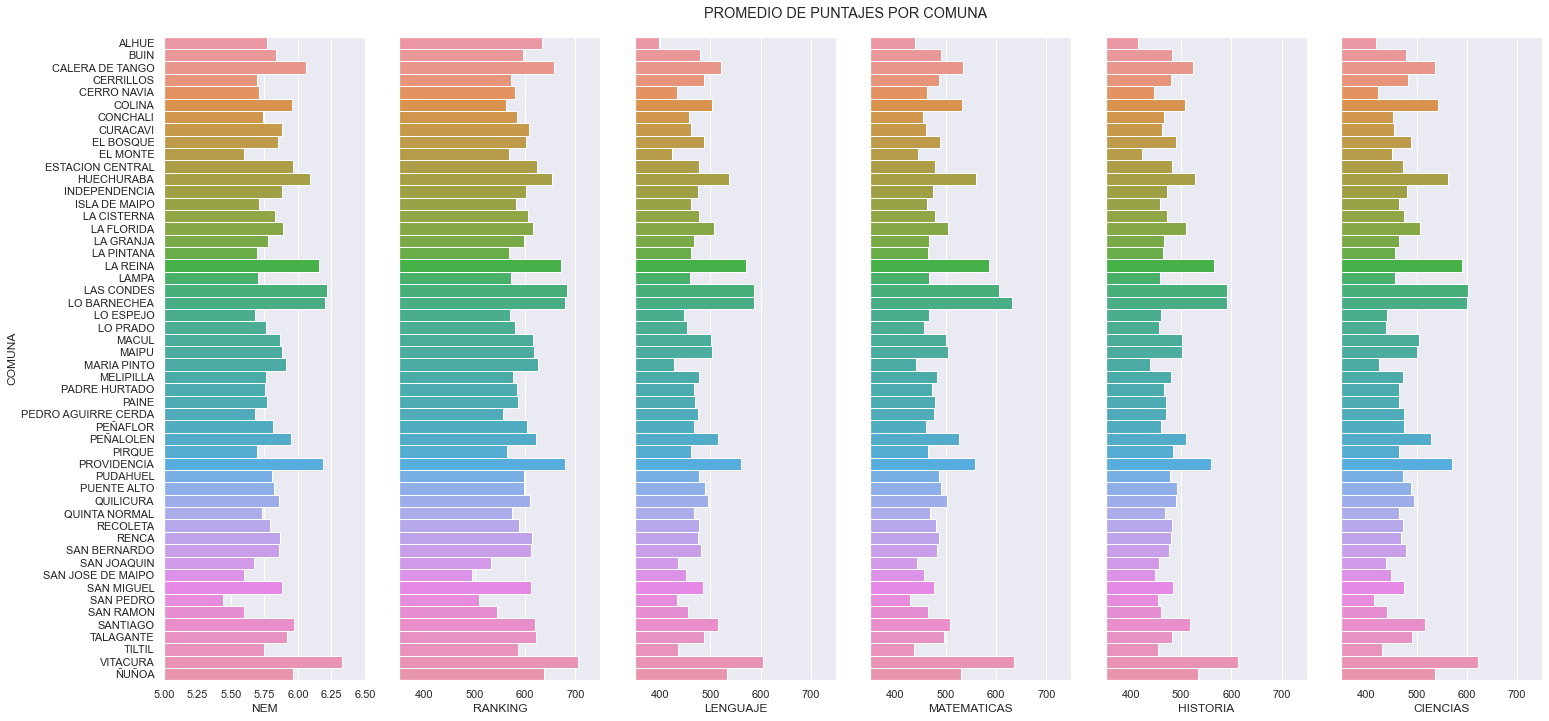

In [73]:
f, ax = plt.subplots(1,6, figsize=(20,10), sharey=True)
sns.set(font_scale=1)
cols = df_promedio.columns[1:]
f.suptitle("PROMEDIO DE PUNTAJES POR COMUNA")
f.tight_layout()
ax[0].set_xlim(5,6.5)
for i in range(0,6):
    if i != 0:
        ax[i].yaxis.set_visible(False)
        ax[i].set_xlim(350,750)
        
    sns.barplot(df_promedio, y="COMUNA", x=cols[i], ax=ax[i],width=1)
